# Features selection

In this script, we remove different groups of features from training to see when the performance decreases

To run this script, the following data files are needed:
- dt_final.xlsx (+)

Saved models:
- xgboost_no_enrichm.model (+)
- xgboost_no_tfidf.model (+)
- xgboost_no_lex.model (+)
- xgboost_no_liwc.model (+)
- xgboost_no_bias_lex.model (+)
- xgboost_no_context.model (+)

(attached: +, not attached: -)

In [1]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_tree
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
import scikitplot as skplt
import xgboost

In [2]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
data = pd.read_excel('dt_final.xlsx')

## 1 Data preparation

In [4]:
dt = data[[
 'label4', 
 'glove_vec300_norm', 
 'tfidf_art', 
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'hedges_context',
 'implicative_verbs_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [5]:
print('Number of missing values:')
mis = (dt.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
dt = dt.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 658


In [6]:
x = dt.drop(['label4'], 1)
y4 = dt[['label4']]

In [7]:
# train-test split
train_features, test_features, train_labels, test_labels = train_test_split(x, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [8]:
feature_names = list(x.columns)
len(feature_names)

282

In [9]:
# matrix for XGBoost
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (28022, 282)
Training Labels Shape: (28022, 1)
Testing Features Shape: (3114, 282)
Testing Labels Shape: (3114, 1)
Training Features for final model Shape: (25219, 282)
Training Labels for final model Shape: (25219, 1)
Validation Features Shape: (2803, 282)
Validation Labels Shape: (2803, 1)


## 2 Features selection

### 2.1 Final model (all features)

In [11]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_tuned_weighted.save_model("xgboost_tuned_weighted.model")
xgboost_tuned_weighted = xgboost.Booster()
xgboost_tuned_weighted.load_model("xgboost_tuned_weighted.model")

In [12]:
feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
feat_imp = feat_imp.reset_index()
feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
feat_imp = feat_imp.sort_values(by=['score'], ascending=False)

feat_imp['name'] = None
for i, feat in enumerate(feature_names):
    #print(i, feat)
    f = 'f'+str(i)
    feat_imp['name'] = feat_imp.apply(lambda row: feat if row['feature']==f else row['name'], axis=1)

feat_imp

,feature,score,name
0,f2,1194.802702,negative_conc
1,f76,469.829776,pos_PROPN
2,f3,143.969471,positive_conc
4,f56,134.593434,work
26,f15,124.563202,boosters
...,...,...,...
87,f167,7.748619,cogproc _context
47,f160,6.290741,anger _context
69,f224,5.473555,dep_advmod_context
59,f113,5.329407,dep_pcomp


### 2.2 Vary importance score [>10 ... >400]

In [13]:
imp_feats = list(feat_imp[feat_imp['score']>400]['name'])
x_imp_feats = x[imp_feats]
list(x_imp_feats)

['negative_conc', 'pos_PROPN']

In [14]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [15]:
column_names = ["imp_thr", "auc", "f1", "precision", "recall"]
imp_perf = pd.DataFrame(columns = column_names)
imp_perf_l = []

In [16]:
thr = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400]
for th in thr:
    imp_feats = list(feat_imp[feat_imp['score']>=th]['name'])
    x_imp_feats = x[imp_feats]
    
    train_features, test_features, train_labels, test_labels = train_test_split(x_imp_feats, y4, 
                                                                            test_size = 0.10, random_state = 42)
    train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                                test_size = 0.10, random_state = 42)
    
    feature_names = list(train_features)
    
    dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
    dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
    dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
    dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)
    
    params = {'max_depth': 6,
     'min_child_weight': 18,
     'eta': 0.2,
     'subsample': 1.0,
     'colsample_bytree': 1.0,
     'objective': 'binary:logistic',
     'disable_default_eval_metric': 1,
     'seed': 42,
     'tree_method': 'hist',
     'scale_pos_weight': 9.471599402092675}
    num_boost_round=999

    xgboost_imp = xgboost.train(
        params,
        dtrain1,
        num_boost_round=num_boost_round,
        evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)

    xgboost_imp_predt = np.where(xgboost_imp.predict(dtest) > 0.5, 1, 0)
    auc = round(metrics.roc_auc_score(dtest.get_label(), xgboost_imp_predt),2)
    f1 = round(metrics.f1_score(dtest.get_label(),xgboost_imp_predt),2)
    pr = round(metrics.precision_score(dtest.get_label(), xgboost_imp_predt),2)
    rc = round(metrics.recall_score(dtest.get_label(), xgboost_imp_predt),2)
    
    values = [th, auc, f1, pr, rc]
    zipped = zip(column_names, values)
    a_dictionary = dict(zipped)
    imp_perf_l.append(a_dictionary) 

imp_perf = imp_perf.append(imp_perf_l, True)
imp_perf

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.38939	dval-F1_score:0.39400
[2]	dtrain-F1_score:0.43131	dval-F1_score:0.43575
[3]	dtrain-F1_score:0.44423	dval-F1_score:0.45439
[4]	dtrain-F1_score:0.44074	dval-F1_score:0.44839
[5]	dtrain-F1_score:0.45089	dval-F1_score:0.45981
[6]	dtrain-F1_score:0.44791	dval-F1_score:0.45426
[7]	dtrain-F1_score:0.44944	dval-F1_score:0.45669
[8]	dtrain-F1_score:0.45450	dval-F1_score:0.47170
[9]	dtrain-F1_score:0.45857	dval-F1_score:0.47261
[10]	dtrain-F1_score:0.46071	dval-F1_score:0.47114
[11]	dtrain-F1_score:0.46204	dval-F1_score:0.47500
[12]	dtrain-F1_score:0.46434	dval-F1_score:0.46967
[13]	dtrain-F1_score:0.46790	dval-F1_score:0.47385
[14]	dtrain-F1_score:0.46814	dval-F1_score:0.47473
[15]	dtrain-F1_score:0.47202	dval-F1_score:0.47489
[16]	dtrain-F1_score:0.47230	dval-F1_score:

[3]	dtrain-F1_score:0.43690	dval-F1_score:0.46644
[4]	dtrain-F1_score:0.44264	dval-F1_score:0.46723
[5]	dtrain-F1_score:0.43549	dval-F1_score:0.45425
[6]	dtrain-F1_score:0.42949	dval-F1_score:0.45732
[7]	dtrain-F1_score:0.42888	dval-F1_score:0.46083
[8]	dtrain-F1_score:0.43519	dval-F1_score:0.46914
[9]	dtrain-F1_score:0.43364	dval-F1_score:0.46697
[10]	dtrain-F1_score:0.43284	dval-F1_score:0.46554
[11]	dtrain-F1_score:0.43400	dval-F1_score:0.46342
[12]	dtrain-F1_score:0.43179	dval-F1_score:0.46131
[13]	dtrain-F1_score:0.43146	dval-F1_score:0.45238
[14]	dtrain-F1_score:0.43228	dval-F1_score:0.45045
[15]	dtrain-F1_score:0.43311	dval-F1_score:0.44977
[16]	dtrain-F1_score:0.43352	dval-F1_score:0.44910
[17]	dtrain-F1_score:0.43405	dval-F1_score:0.44934
[18]	dtrain-F1_score:0.43860	dval-F1_score:0.45277
Stopping. Best iteration:
[8]	dtrain-F1_score:0.43519	dval-F1_score:0.46914

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be 

[8]	dtrain-F1_score:0.38409	dval-F1_score:0.40689
[9]	dtrain-F1_score:0.38409	dval-F1_score:0.40689
[10]	dtrain-F1_score:0.38409	dval-F1_score:0.40689
[11]	dtrain-F1_score:0.38409	dval-F1_score:0.40689
[12]	dtrain-F1_score:0.38409	dval-F1_score:0.40689
Stopping. Best iteration:
[2]	dtrain-F1_score:0.38409	dval-F1_score:0.40689



,imp_thr,auc,f1,precision,recall
0,10,0.77,0.41,0.28,0.74
1,20,0.78,0.42,0.29,0.75
2,30,0.78,0.41,0.28,0.76
3,40,0.76,0.39,0.27,0.74
4,50,0.76,0.40,0.27,0.74
5,60,0.76,0.39,0.27,0.73
6,70,0.75,0.36,0.24,0.78
7,80,0.71,0.36,0.26,0.62
8,90,0.71,0.36,0.25,0.63
9,100,0.71,0.36,0.26,0.60


### 2.3 All features without enrichment features

In [17]:
x_no_enrichm = x.drop(['pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',                
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context'], 1)

In [18]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_enrichm, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [19]:
feature_names = list(x_no_enrichm.columns)
len(feature_names)

134

In [20]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [21]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [22]:
xgboost_no_enrichm = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.36494	dval-F1_score:0.37642
[2]	dtrain-F1_score:0.42523	dval-F1_score:0.42336
[3]	dtrain-F1_score:0.43403	dval-F1_score:0.43421
[4]	dtrain-F1_score:0.43395	dval-F1_score:0.44588
[5]	dtrain-F1_score:0.43873	dval-F1_score:0.45141
[6]	dtrain-F1_score:0.44150	dval-F1_score:0.44584
[7]	dtrain-F1_score:0.44035	dval-F1_score:0.44513
[8]	dtrain-F1_score:0.44220	dval-F1_score:0.44584
[9]	dtrain-F1_score:0.44785	dval-F1_score:0.45827
[10]	dtrain-F1_score:0.44875	dval-F1_score:0.45566
[11]	dtrain-F1_score:0.44864	dval-F1_score:0.45454
[12]	dtrain-F1_score:0.44842	dval-F1_score:0.45386
[13]	dtrain-F1_score:0.45109	dval-F1_score:0.45688
[14]	dtrain-F1_score:0.45520	dval-F1_score:0.45550
[15]	dtrain-F1_score:0.45783	dval-F1_score:0.44879
[16]	dtrain-F1_score:0.45830	dval-F1_score:

In [24]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_no_enrichm.save_model("xgboost_no_enrichm.model")
xgboost_no_enrichm = xgboost.Booster()
xgboost_no_enrichm.load_model("xgboost_no_enrichm.model")

In [23]:
xgboost_no_enrichm_predt = np.where(xgboost_no_enrichm.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_enrichm, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_enrichm_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_enrichm_predt).transpose())

Performance of xgboost_no_enrichm, test:
F1: 0.41
Precision: 0.29
Recall: 0.67
AUC: 0.75
Accuracy: 0.81
Confusion matrix:
 [[2325  101]
 [ 487  201]]


Text(0, 0.5, 'Features')

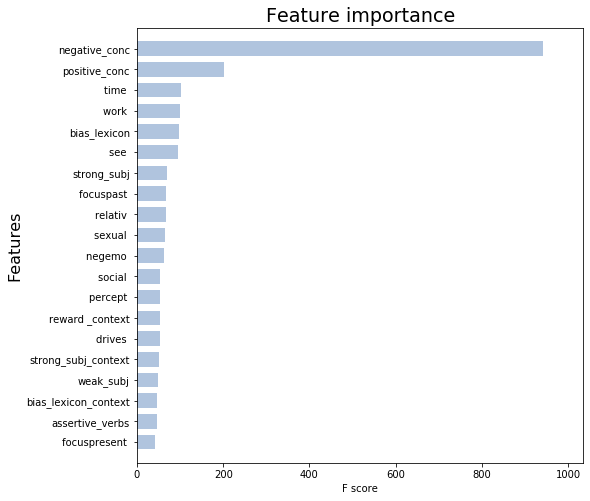

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_enrichm, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.4 All features without TF-IDF

In [26]:
x_no_tfidf = x.drop(['tfidf_art'], 1)

In [27]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_tfidf, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [28]:
feature_names = list(x_no_tfidf.columns)
len(feature_names)

281

In [29]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [30]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [31]:
xgboost_no_tfidf = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.39614	dval-F1_score:0.40592
[2]	dtrain-F1_score:0.43881	dval-F1_score:0.43972
[3]	dtrain-F1_score:0.45284	dval-F1_score:0.45596
[4]	dtrain-F1_score:0.44880	dval-F1_score:0.45603
[5]	dtrain-F1_score:0.44957	dval-F1_score:0.46527
[6]	dtrain-F1_score:0.45390	dval-F1_score:0.45741
[7]	dtrain-F1_score:0.45397	dval-F1_score:0.45669
[8]	dtrain-F1_score:0.45252	dval-F1_score:0.45201
[9]	dtrain-F1_score:0.45727	dval-F1_score:0.45652
[10]	dtrain-F1_score:0.45906	dval-F1_score:0.46034
[11]	dtrain-F1_score:0.46444	dval-F1_score:0.46440
[12]	dtrain-F1_score:0.46560	dval-F1_score:0.46368
[13]	dtrain-F1_score:0.46804	dval-F1_score:0.46296
[14]	dtrain-F1_score:0.46691	dval-F1_score:0.46390
[15]	dtrain-F1_score:0.47082	dval-F1_score:0.46789
[16]	dtrain-F1_score:0.47321	dval-F1_score:

In [34]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_no_tfidf.save_model("xgboost_no_tfidf.model")
xgboost_no_tfidf = xgboost.Booster()
xgboost_no_tfidf.load_model("xgboost_no_tfidf.model")

In [32]:
xgboost_no_tfidf_predt = np.where(xgboost_no_tfidf.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_tfidf, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_tfidf_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_tfidf_predt).transpose())

Performance of xgboost_no_tfidf, test:
F1: 0.42
Precision: 0.29
Recall: 0.75
AUC: 0.77
Accuracy: 0.8
Confusion matrix:
 [[2253   76]
 [ 559  226]]


Text(0, 0.5, 'Features')

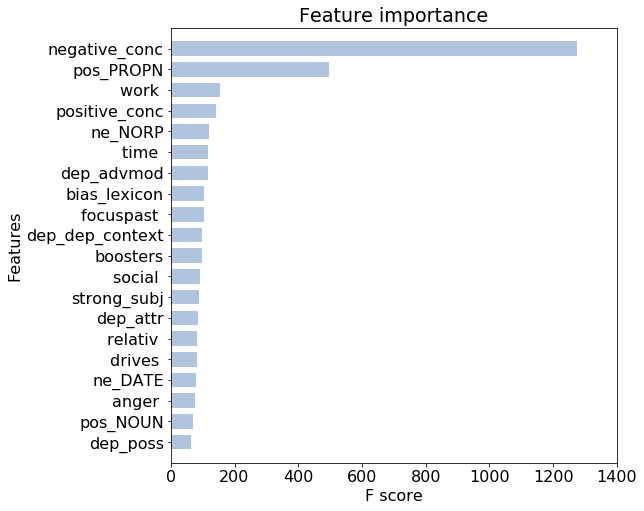

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_tfidf, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.5 All features without LIWC2015

In [35]:
x_no_liwc = x.drop(['affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context'], 1)

In [36]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_liwc, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [37]:
feature_names = list(x_no_liwc.columns)
len(feature_names)

178

In [38]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [39]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [40]:
xgboost_no_liwc = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.40297	dval-F1_score:0.40425
[2]	dtrain-F1_score:0.44069	dval-F1_score:0.43911
[3]	dtrain-F1_score:0.45113	dval-F1_score:0.44330
[4]	dtrain-F1_score:0.44579	dval-F1_score:0.44260
[5]	dtrain-F1_score:0.44627	dval-F1_score:0.46230
[6]	dtrain-F1_score:0.45246	dval-F1_score:0.45192
[7]	dtrain-F1_score:0.45204	dval-F1_score:0.45223
[8]	dtrain-F1_score:0.45495	dval-F1_score:0.45642
[9]	dtrain-F1_score:0.45418	dval-F1_score:0.45201
[10]	dtrain-F1_score:0.45241	dval-F1_score:0.44954
[11]	dtrain-F1_score:0.45582	dval-F1_score:0.45566
[12]	dtrain-F1_score:0.45890	dval-F1_score:0.45619
[13]	dtrain-F1_score:0.46186	dval-F1_score:0.44776
[14]	dtrain-F1_score:0.46327	dval-F1_score:0.44807
[15]	dtrain-F1_score:0.46438	dval-F1_score:0.45388
Stopping. Best iteration:
[5]	dtrain-F1_sco

In [41]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_liwc.save_model("xgboost_no_liwc.model")
# xgboost_no_liwc = xgboost.Booster()
# xgboost_no_liwc.load_model("xgboost_no_liwc.model")

In [42]:
xgboost_no_liwc_predt = np.where(xgboost_no_liwc.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_liwc, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_liwc_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_liwc_predt).transpose())

Performance of xgboost_no_liwc, test:
F1: 0.4
Precision: 0.28
Recall: 0.72
AUC: 0.76
Accuracy: 0.8
Confusion matrix:
 [[2260   86]
 [ 552  216]]


Text(0, 0.5, 'Features')

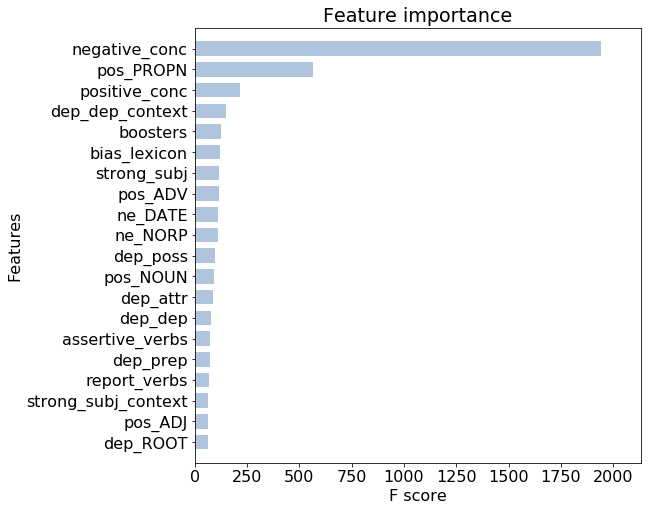

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_liwc, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.6 All features without lexical features

In [72]:
x_no_lex = x.drop(['negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',                   
 'hedges',
 'boosters',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context'], 1)

In [73]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_lex, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [74]:
feature_names = list(x_no_lex.columns)
len(feature_names)

254

In [75]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [76]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [77]:
xgboost_no_lex = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[2]	dtrain-F1_score:0.28417	dval-F1_score:0.30624
[3]	dtrain-F1_score:0.31923	dval-F1_score:0.33218
[4]	dtrain-F1_score:0.32571	dval-F1_score:0.33956
[5]	dtrain-F1_score:0.35669	dval-F1_score:0.35934
[6]	dtrain-F1_score:0.35702	dval-F1_score:0.34574
[7]	dtrain-F1_score:0.36580	dval-F1_score:0.36562
[8]	dtrain-F1_score:0.37273	dval-F1_score:0.37301
[9]	dtrain-F1_score:0.37602	dval-F1_score:0.37408
[10]	dtrain-F1_score:0.37747	dval-F1_score:0.36912
[11]	dtrain-F1_score:0.38131	dval-F1_score:0.36700
[12]	dtrain-F1_score:0.38470	dval-F1_score:0.36810
[13]	dtrain-F1_score:0.38805	dval-F1_score:0.37363
[14]	dtrain-F1_score:0.38825	dval-F1_score:0.37181
[15]	dtrain-F1_score:0.38830	dval-F1_score:0.37454
[16]	dtrain-F1_score:0.38977	dval-F1_score:

In [78]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_no_lex.save_model("xgboost_no_lex.model")
xgboost_no_lex = xgboost.Booster()
xgboost_no_lex.load_model("xgboost_no_lex.model")

In [79]:
xgboost_no_lex_predt = np.where(xgboost_no_lex.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_lex, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_lex_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_lex_predt).transpose())

Performance of xgboost_no_lex, test:
F1: 0.35
Precision: 0.23
Recall: 0.75
AUC: 0.74
Accuracy: 0.73
Confusion matrix:
 [[2053   74]
 [ 759  228]]


Text(0, 0.5, 'Features')

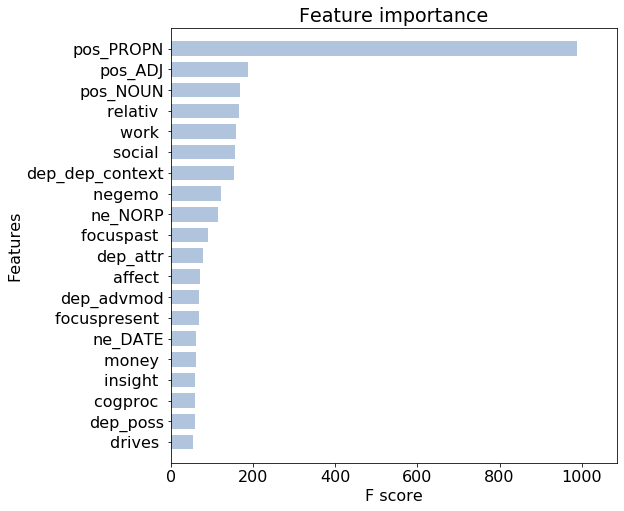

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_lex, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.7 All features without bias lexicon

In [54]:
x_no_bias_lex = x.drop(['bias_lexicon', 'bias_lexicon_context'], 1)

In [55]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_bias_lex, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [56]:
feature_names = list(x_no_bias_lex.columns)
len(feature_names)

280

In [57]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [58]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [59]:
xgboost_no_bias_lex = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.38308	dval-F1_score:0.39301
[2]	dtrain-F1_score:0.44027	dval-F1_score:0.43310
[3]	dtrain-F1_score:0.44368	dval-F1_score:0.44174
[4]	dtrain-F1_score:0.43851	dval-F1_score:0.44079
[5]	dtrain-F1_score:0.43934	dval-F1_score:0.44013
[6]	dtrain-F1_score:0.44170	dval-F1_score:0.44481
[7]	dtrain-F1_score:0.44671	dval-F1_score:0.44654
[8]	dtrain-F1_score:0.44721	dval-F1_score:0.45101
[9]	dtrain-F1_score:0.44756	dval-F1_score:0.44992
[10]	dtrain-F1_score:0.45084	dval-F1_score:0.45131
[11]	dtrain-F1_score:0.45181	dval-F1_score:0.44923
[12]	dtrain-F1_score:0.45195	dval-F1_score:0.45062
[13]	dtrain-F1_score:0.45568	dval-F1_score:0.45454
[14]	dtrain-F1_score:0.45728	dval-F1_score:0.46316
[15]	dtrain-F1_score:0.46539	dval-F1_score:0.45536
[16]	dtrain-F1_score:0.46824	dval-F1_score:

In [60]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_no_bias_lex.save_model("xgboost_no_bias_lex.model")
xgboost_no_bias_lex = xgboost.Booster()
xgboost_no_bias_lex.load_model("xgboost_no_bias_lex.model")

In [61]:
xgboost_no_bias_lex_predt = np.where(xgboost_no_bias_lex.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_bias_lex, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_bias_lex_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_bias_lex_predt).transpose())

Performance of xgboost_no_bias_lex, test:
F1: 0.41
Precision: 0.28
Recall: 0.75
AUC: 0.77
Accuracy: 0.79
Confusion matrix:
 [[2224   74]
 [ 588  228]]


Text(0, 0.5, 'Features')

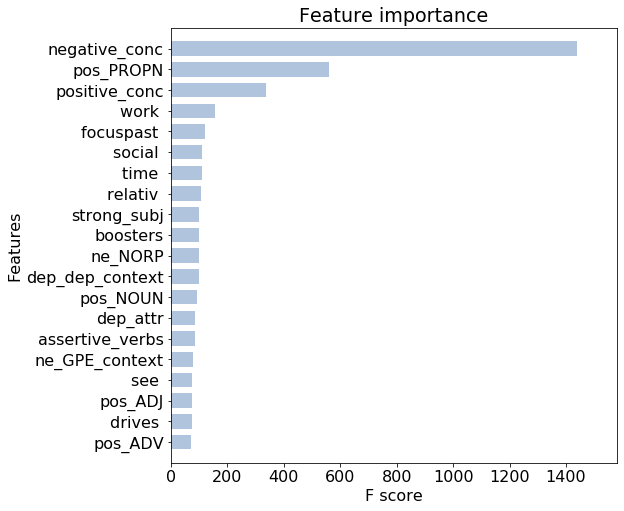

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_bias_lex, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.8 No context

In [63]:
x_no_context = x.drop(['negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',                       
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context'], 1)

In [64]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_context, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [65]:
feature_names = list(x_no_context.columns)
len(feature_names)

142

In [66]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [67]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [68]:
xgboost_no_context = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.39342	dval-F1_score:0.39915
[2]	dtrain-F1_score:0.44534	dval-F1_score:0.44890
[3]	dtrain-F1_score:0.44346	dval-F1_score:0.45946
[4]	dtrain-F1_score:0.44666	dval-F1_score:0.45854
[5]	dtrain-F1_score:0.44916	dval-F1_score:0.45826
[6]	dtrain-F1_score:0.44726	dval-F1_score:0.45586
[7]	dtrain-F1_score:0.44819	dval-F1_score:0.46105
[8]	dtrain-F1_score:0.45027	dval-F1_score:0.46914
[9]	dtrain-F1_score:0.45261	dval-F1_score:0.46626
[10]	dtrain-F1_score:0.45229	dval-F1_score:0.46697
[11]	dtrain-F1_score:0.45338	dval-F1_score:0.46861
[12]	dtrain-F1_score:0.45979	dval-F1_score:0.47113
[13]	dtrain-F1_score:0.46011	dval-F1_score:0.47041
[14]	dtrain-F1_score:0.46062	dval-F1_score:0.47201
[15]	dtrain-F1_score:0.45977	dval-F1_score:0.47360
[16]	dtrain-F1_score:0.45979	dval-F1_score:

In [69]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_no_context.save_model("xgboost_no_context.model")
xgboost_no_context = xgboost.Booster()
xgboost_no_context.load_model("xgboost_no_context.model")

In [70]:
xgboost_no_context_predt = np.where(xgboost_no_context.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_context, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_context_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_context_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_context_predt).transpose())

Performance of xgboost_no_context, test:
F1: 0.43
Precision: 0.3
Recall: 0.75
AUC: 0.78
Accuracy: 0.81
Confusion matrix:
 [[2283   77]
 [ 529  225]]


Text(0, 0.5, 'Features')

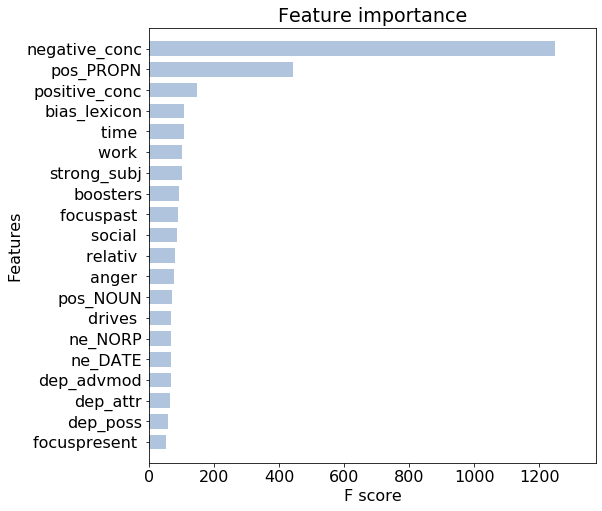

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_context, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)